In [1]:
%matplotlib nbagg
import warnings
import inspect
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
import math

In [2]:
from cued_sf2_lab.jpeg import jpegenc

from cued_sf2_lab.dct import dct_ii
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.dct import regroup

# import schemes
from cued_sf2_lab.schemes.DWT_chen import DWT

In [3]:
# load in the image
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

# fig, ax = plt.subplots()
# plot_image(X, ax=ax)

In [4]:
n=4

dwt = DWT(X, n)

Y = dwt.encode()
# fig, ax = plt.subplots()
# plot_image(Y, ax=ax)

Z = dwt.decode(Y)
# fig, ax = plt.subplots()
# plot_image(Z, ax=ax)

<IPython.core.display.Javascript object>


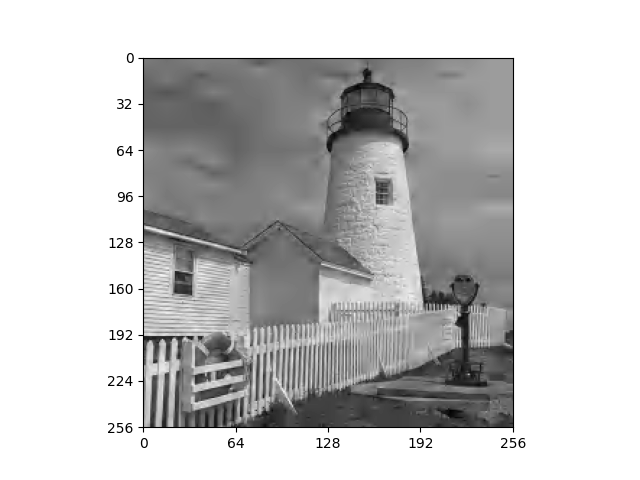

In [5]:
# constant step
Z = dwt.const_step_enc_dec()
fig, ax = plt.subplots()
plot_image(Z, ax=ax)

In [6]:
# equal MSE
dwtstep_ratios = dwt.step_ratios_dwt_emse(X, 5)
print(dwtstep_ratios)

[[10.27794221  6.70252379  3.65517741  1.87134525  0.94135533  1.        ]
 [10.27794221  6.70252379  3.65517741  1.87134525  0.94135533  0.        ]
 [ 7.42391304  5.78813559  3.36453202  1.75353017  0.88614985  0.        ]]


C:\Users\Yi Chen\OneDrive - University of Cambridge\Cambridge\Part IIA\SF2\cued_sf2_lab\cued_sf2_lab\schemes\DWT_chen.py:181: RuntimeWarning: divide by zero encountered in true_divide
  dwtstep_ratios = sqrt_energies[0,N]/sqrt_energies


In [7]:
# optimum step ratios emse
print(dwt.get_optimum_step_ratio(X, 5))

[[12.03703044  7.84967275  4.28076758  2.19162935  1.10246998  1.17115179]
 [12.03703044  7.84967275  4.28076758  2.19162935  1.10246998  0.        ]
 [ 8.69452907  6.77878537  3.94037771  2.05365     1.03781599  0.        ]]


In [8]:
# compression ratios

for n in [1,2,3,4,5]:
    cr = dwt.get_cr_with_opt_step(X, n)
    print(cr)

2.1310396694867313
2.8575604598746103
3.044526210758605
3.083523780563806
3.0941370350722486


<IPython.core.display.Javascript object>


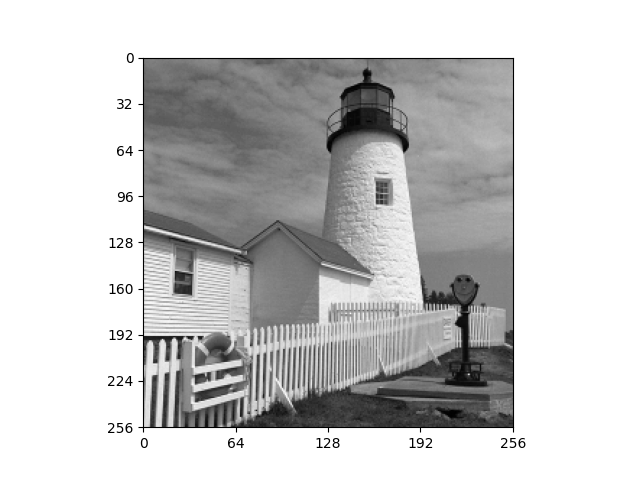

1.15679813297977


In [12]:
N = 5
step = 0.2
rise = 0.5

bits, err, Zp = dwt.enc_dec_quantise_rise(X, N, step, rise)

fig, ax = plt.subplots()
plot_image(Zp, ax=ax)

print(err)